In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
import nltk
nltk.download('movie_reviews')
nltk.download('stopwords')

from nltk.corpus import movie_reviews

# Load data
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

df = pd.DataFrame(documents, columns=['review', 'sentiment'])
df.head()


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


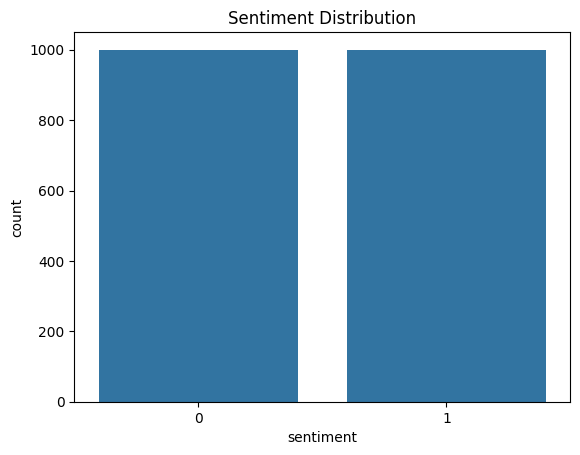

In [3]:
df['sentiment'] = df['sentiment'].map({'pos': 1, 'neg': 0})


sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


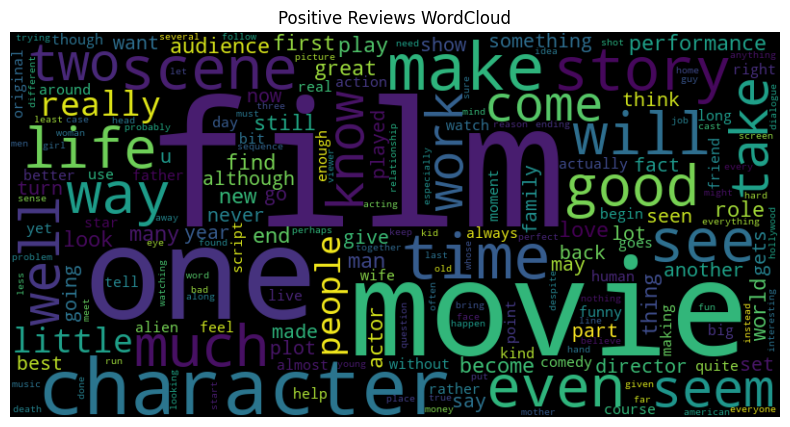

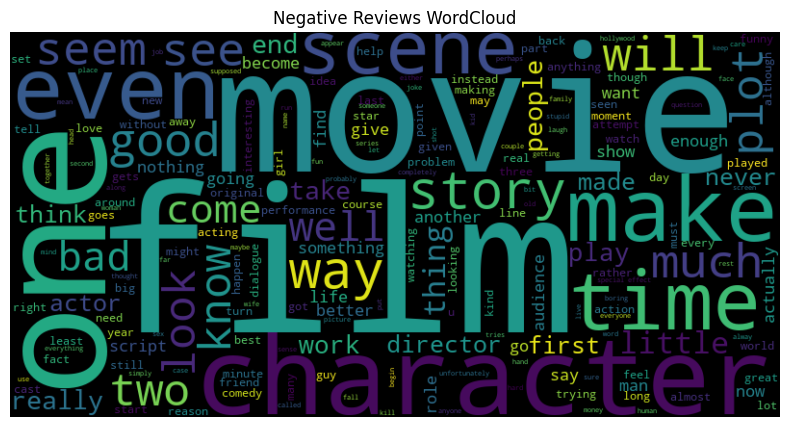

In [4]:
positive_reviews = df[df['sentiment']==1]['review'].str.cat(sep=' ')
negative_reviews = df[df['sentiment']==0]['review'].str.cat(sep=' ')

# Positive WordCloud
wordcloud_pos = WordCloud(width=800, height=400).generate(positive_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews WordCloud')
plt.show()

# Negative WordCloud
wordcloud_neg = WordCloud(width=800, height=400).generate(negative_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews WordCloud')
plt.show()


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [6]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)


Accuracy: 0.8125
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       199
           1       0.84      0.77      0.81       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



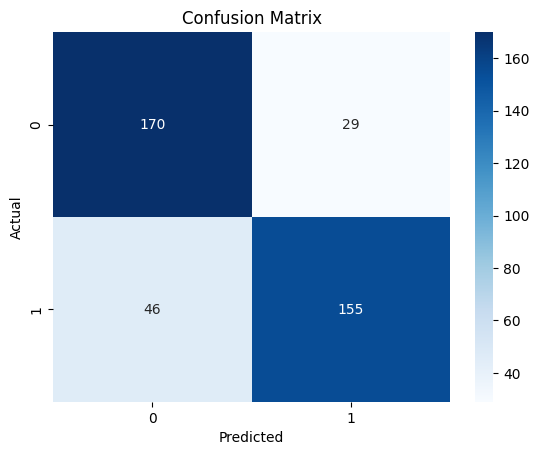

In [7]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [8]:
def predict_sentiment(text):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)
    sentiment = "Positive" if prediction[0] == 1 else "Negative"
    return sentiment


custom_text = "I really loved the movie, it was fantastic!"
print(f"Sentiment: {predict_sentiment(custom_text)}")


Sentiment: Positive
